In [1]:
# Module Import
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
# Tech stock list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN' , 'NVDA', 'META', 'TSLA']
non_tech_list = ['SPY', 'COST', 'SR', 'LLY', 'JPM', 'UNH', 'V', 'HD']

In [5]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
tech_company_list = [AAPL, GOOG, MSFT, AMZN , NVDA, META, TSLA]
tech_company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NVIDIA", "META", "TESLA"]

In [8]:
for company, tcom_name in zip(tech_company_list, tech_company_name):
    company["tech_company_name"] = tcom_name

In [9]:
df = pd.concat(tech_company_list, axis=0)
df.tail(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-30  208.630005  214.570007  207.029999  214.110001  214.110001   
2024-09-03  215.259995  219.899994  209.639999  210.600006  210.600006   
2024-09-04  210.589996  222.220001  210.570007  219.410004  219.410004   
2024-09-05  223.490005  235.000000  222.250000  230.169998  230.169998   
2024-09-06  232.600006  233.600006  210.509995  210.729996  210.729996   
2024-09-09  216.199997  219.869995  213.669998  216.270004  216.270004   
2024-09-10  220.070007  226.399994  218.639999  226.169998  226.169998   
2024-09-11  224.550003  228.470001  216.800003  228.130005  228.130005   
2024-09-12  224.660004  231.449997  223.830002  229.809998  229.809998   
2024-09-13  228.000000  232.669998  226.320007  230.289993  230.289993   

               Volume tech_company_name  
Date                                     
2024-08-30   63370600             TESLA  
2024-09-03   76714200             TESLA  
2024-09-04   80651800             TESLA  
2024-09-05  119355000             TESLA  
2024-09-06  112177000             TESLA  
2024-09-09   67443500             TESLA  
2024-09-10   78891100             TESLA  
2024-09-11   83548600             TESLA  
2024-09-12   72020000             TESLA  
2024-09-13   59383300             TESLA

In [10]:
#data = yf.download("SPY AAPL", period="1mo")
#df = pd.DataFrame(data)

In [11]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   191.884860  193.658168  190.242589  192.040638  191.552751   
std     19.247376   19.461635   18.783839   19.160344   19.340578   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.575005  177.645004  174.099998  175.959999  175.064186   
50%    188.149994  189.500000  186.789993  188.039993  187.329147   
75%    206.099998  211.635002  203.730003  207.815002  207.574738   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.510000e+02  
mean   5.899464e+07  
std    2.487608e+07  
min    2.404830e+07  
25%    4.508840e+07  
50%    5.302030e+07  
75%    6.551875e+07  
max    2.464214e+08

In [12]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-09-15 to 2024-09-13
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               251 non-null    float64
 1   High               251 non-null    float64
 2   Low                251 non-null    float64
 3   Close              251 non-null    float64
 4   Adj Close          251 non-null    float64
 5   Volume             251 non-null    int64  
 6   tech_company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


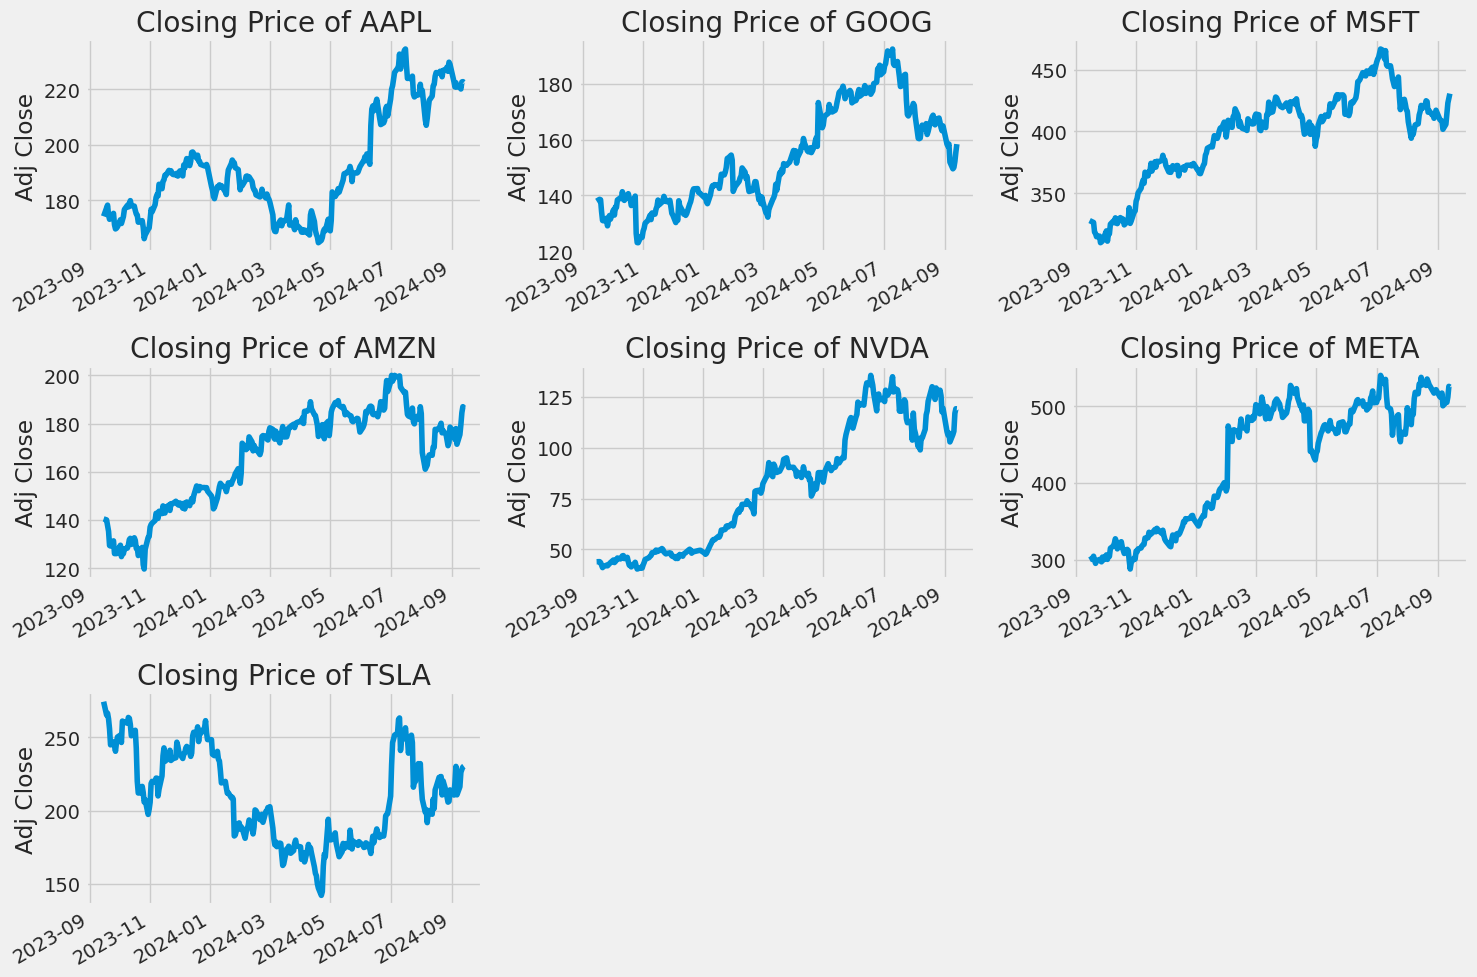

In [13]:
# Historical View of Closing Prices
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


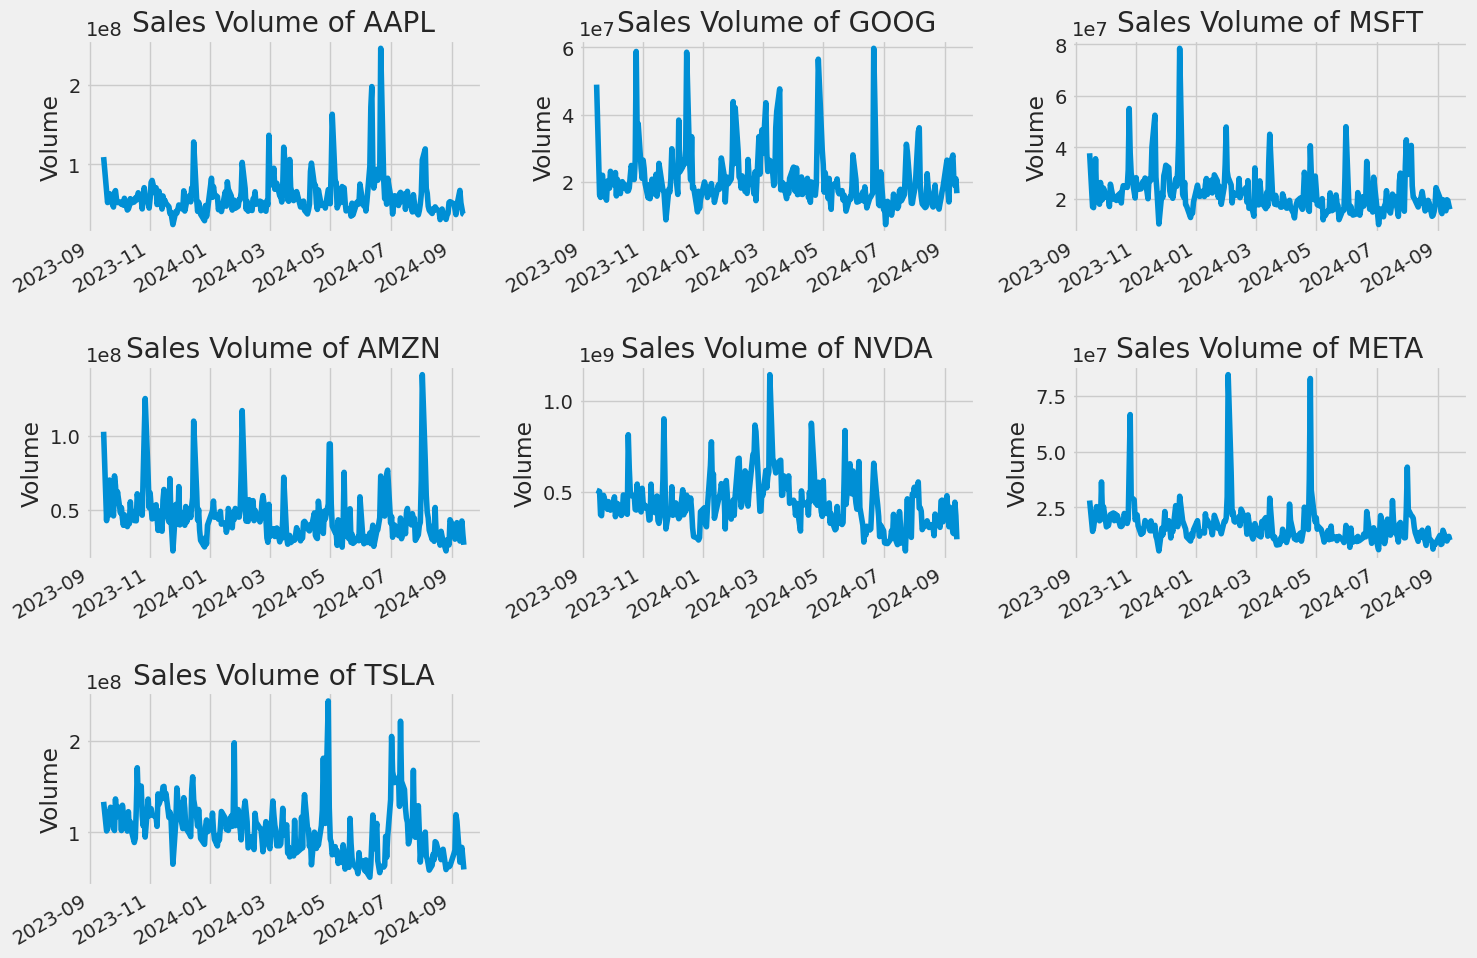

In [14]:
# Check the Volume of transactions each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {tech_list[i - 1]}")

plt.tight_layout()

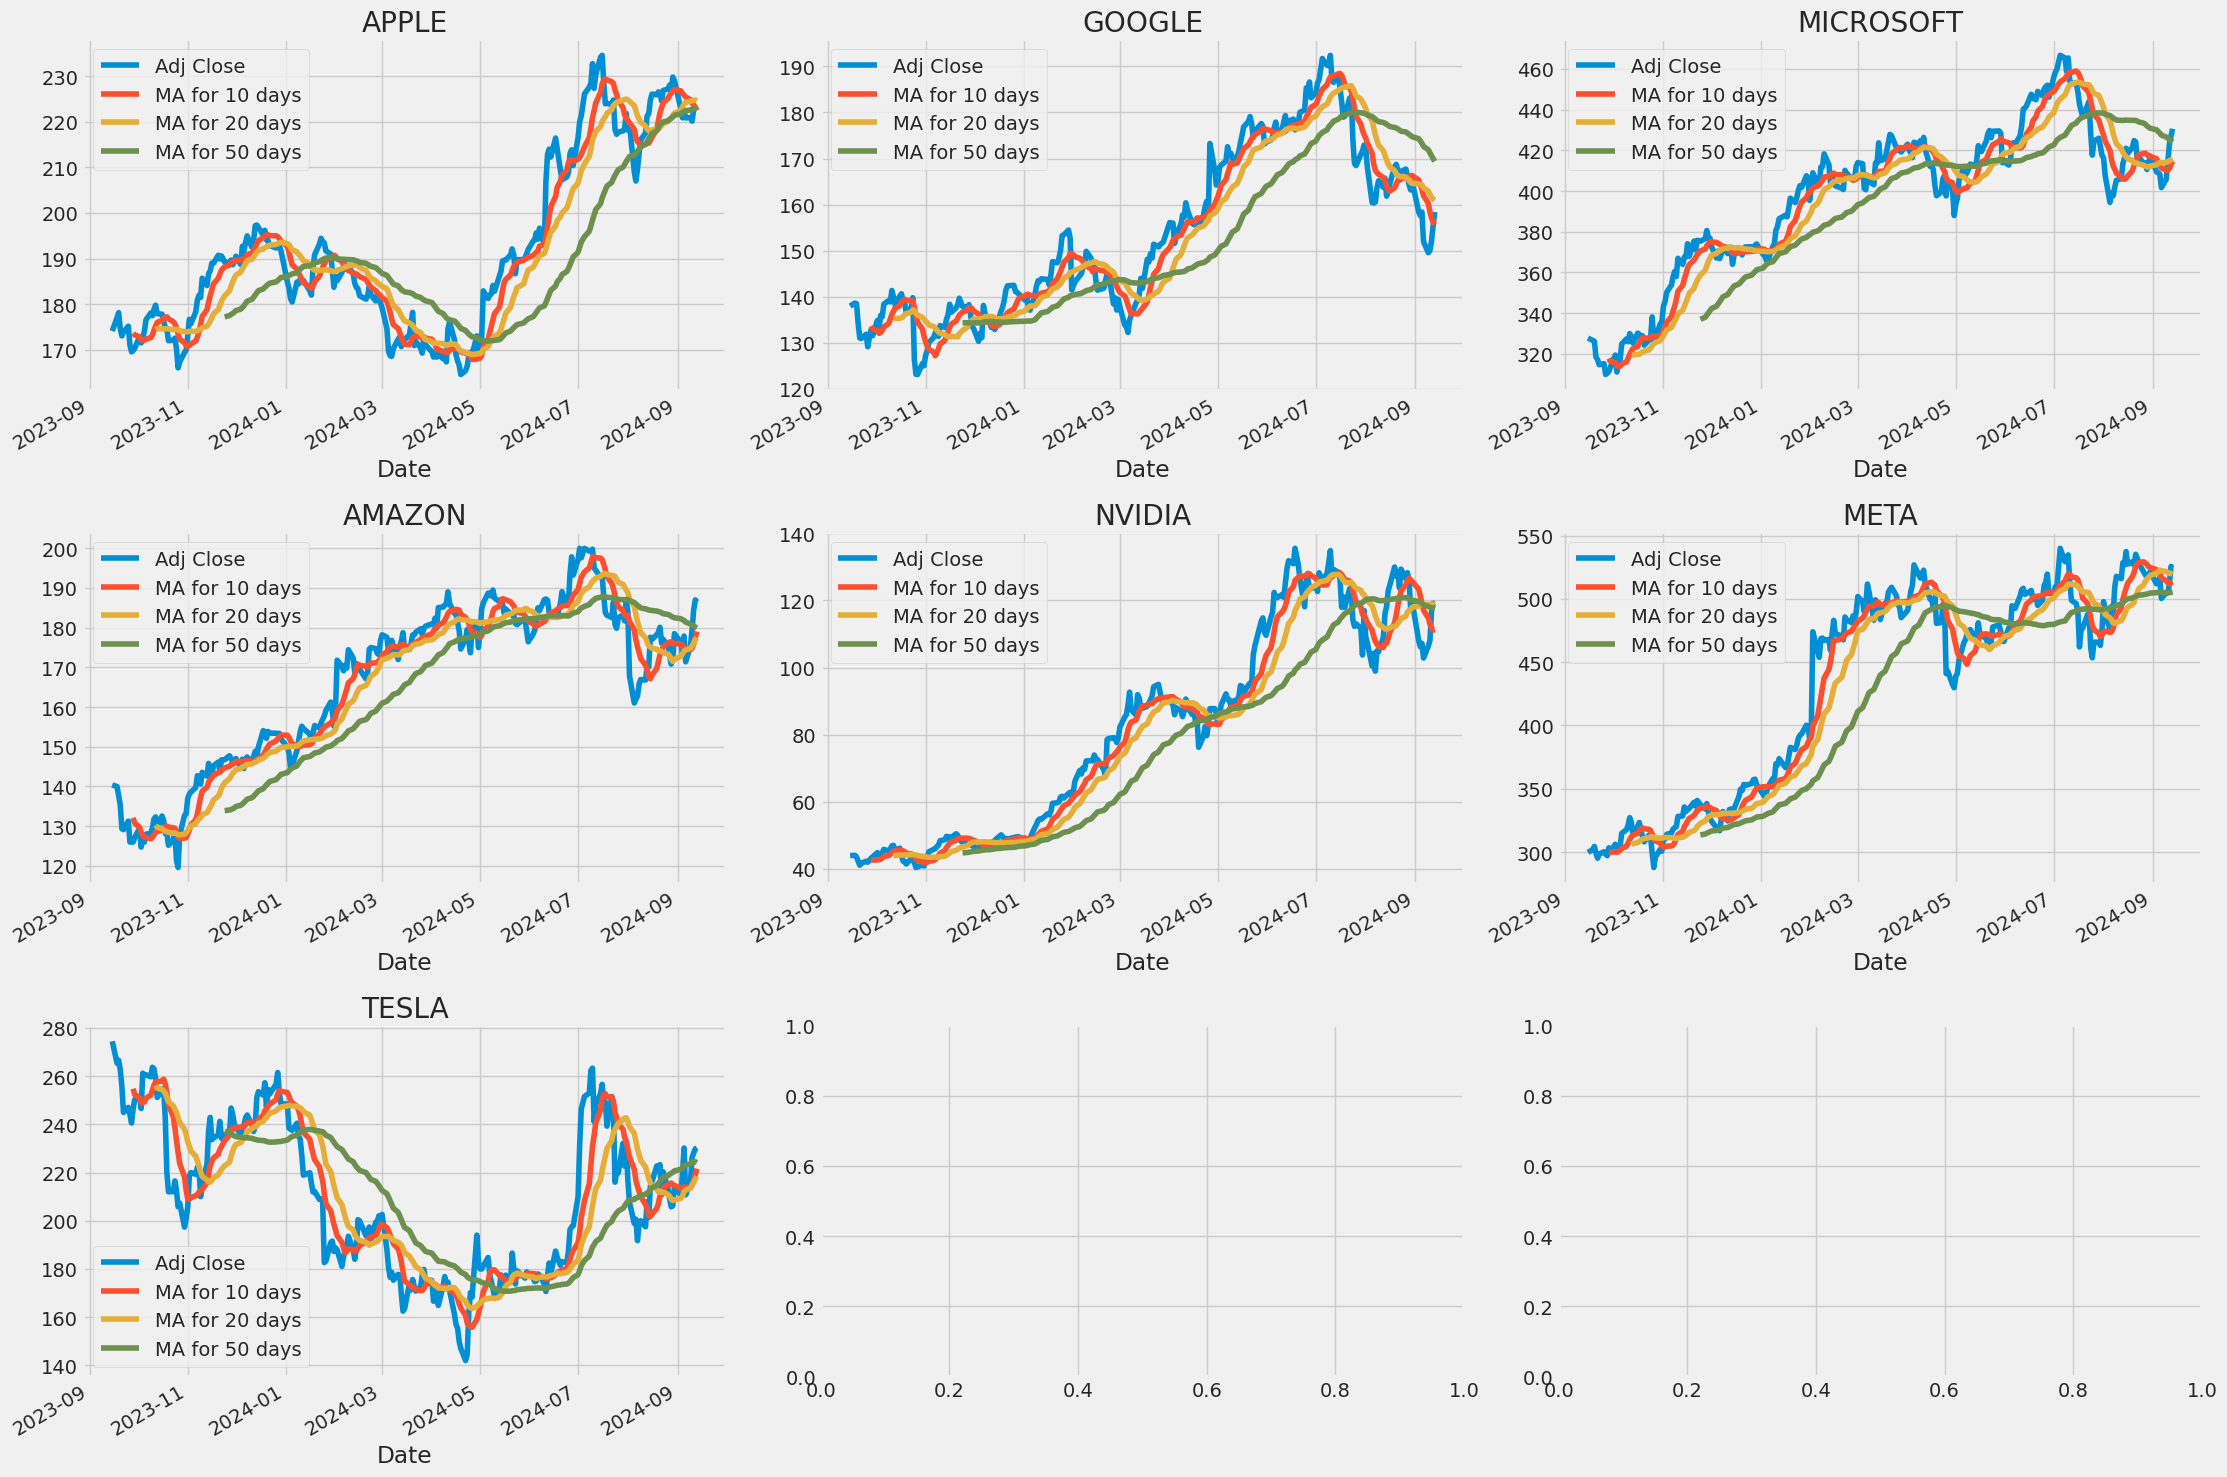

In [15]:
#Plot the Moving Average MA

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in tech_company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(22.5)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVIDIA')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('META')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

 
fig.tight_layout()

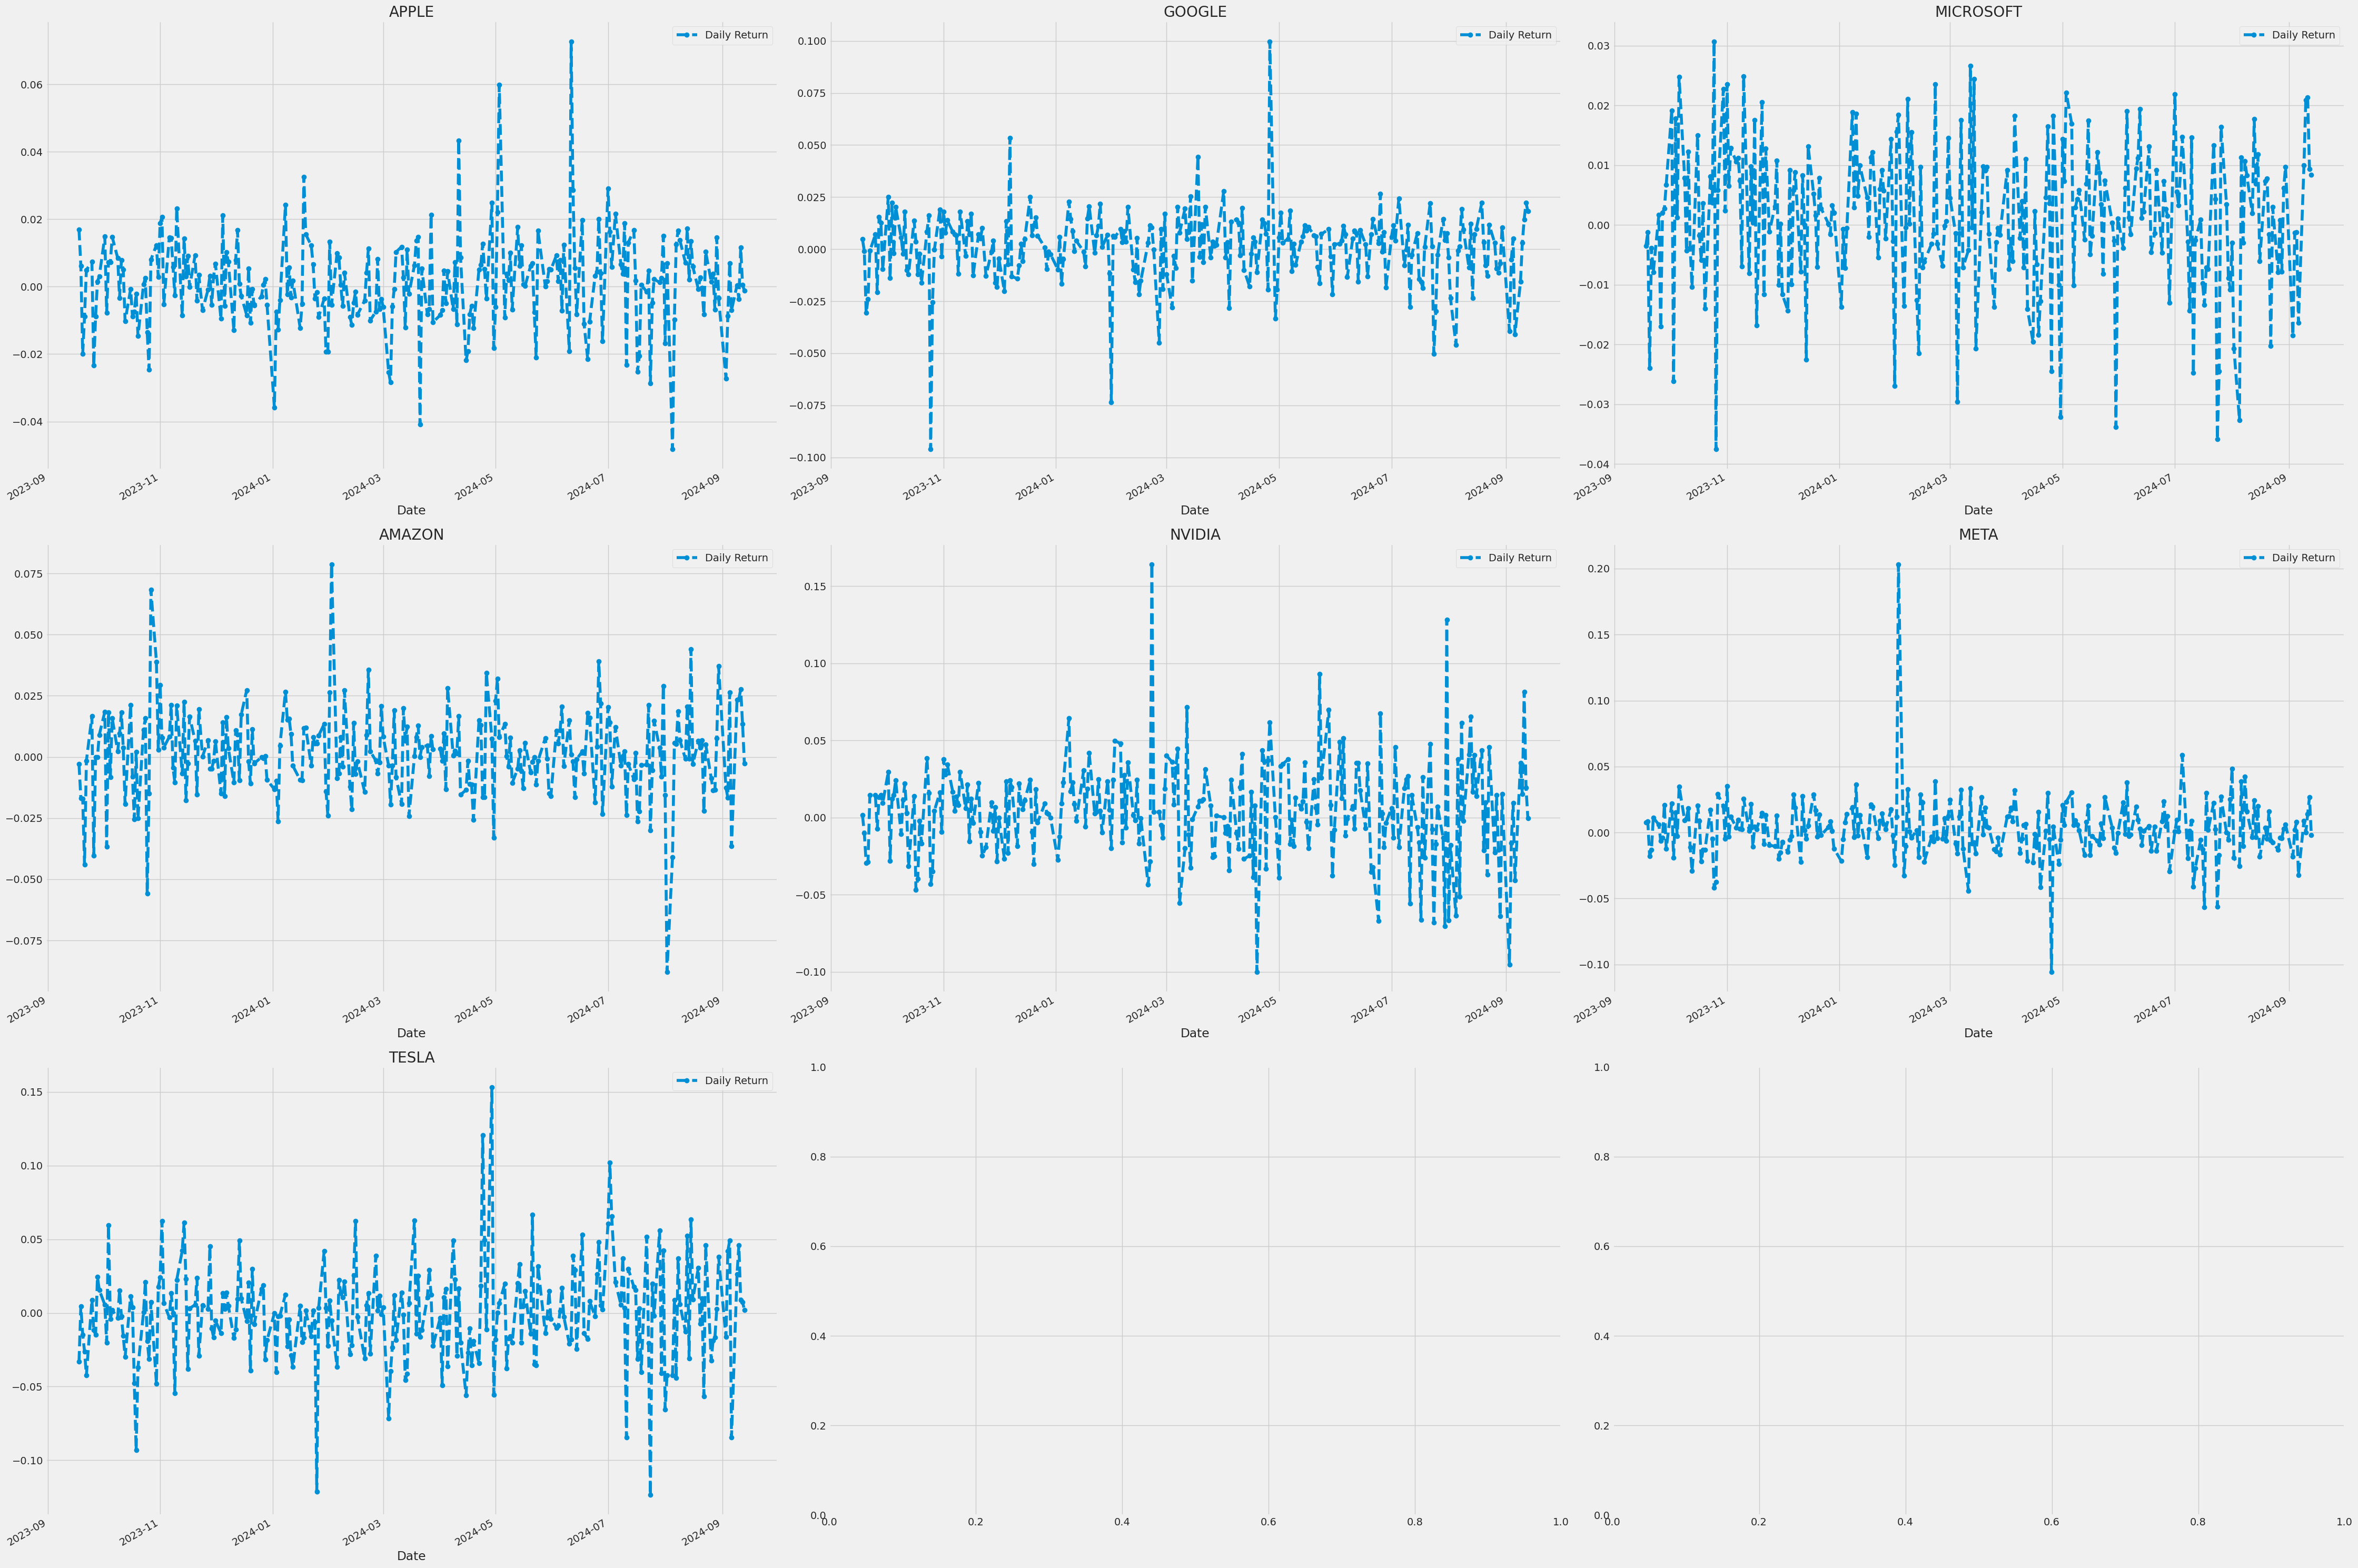

In [16]:
# Percentage change of each day

for company in tech_company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

#Plot Daily returns
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(30)
fig.set_figwidth(45)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMAZON')

NVDA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NVIDIA')

META['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('META')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

 
fig.tight_layout()

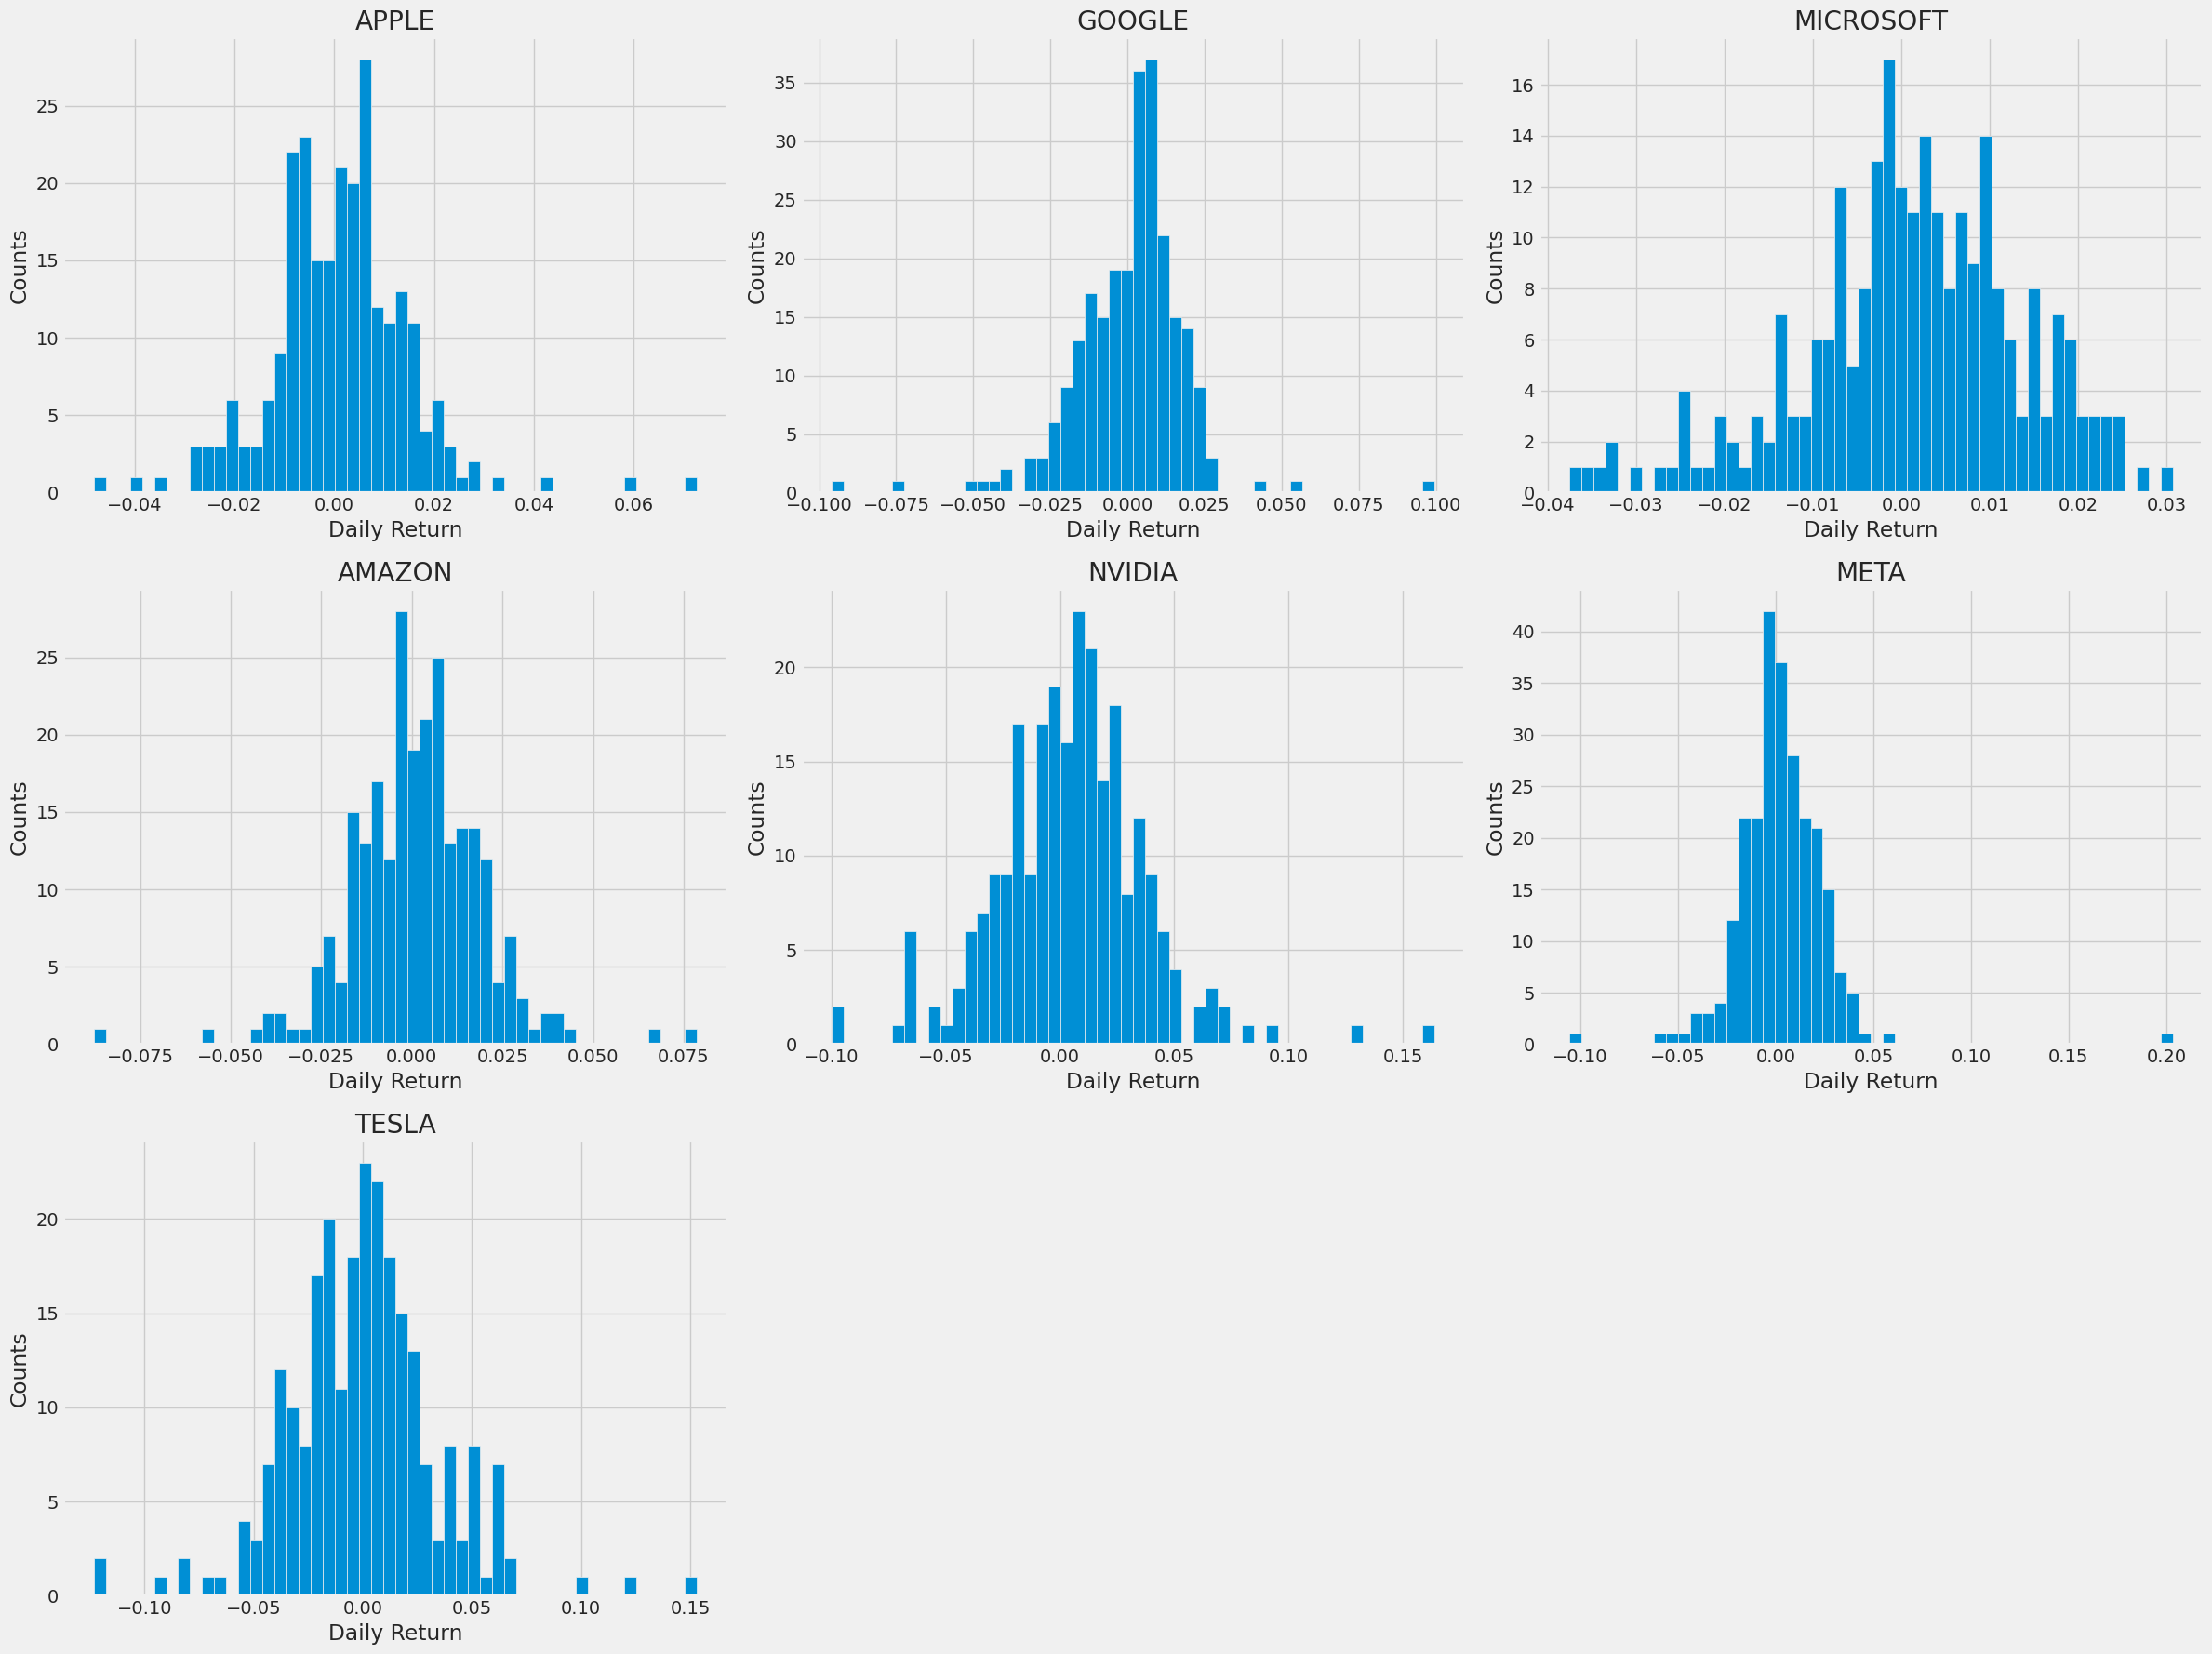

In [17]:
plt.figure(figsize=(24, 18))

for i, company in enumerate(tech_company_list, 1):
    plt.subplot(3, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_company_name[i - 1]}')

plt.tight_layout()

In [18]:
#Create DF with all companies in one column
closing_df = pd.concat(tech_company_list, axis=0)
#Remove unused columns
closing_df = closing_df[['Adj Close','tech_company_name']]
 
#Pivot giving each companies Adj Close in seperate columns.
closing_df_pivot = closing_df.pivot( columns='tech_company_name' , values='Adj Close')
closing_df_pivot.head()


tech_company_name      AMAZON       APPLE      GOOGLE        META   MICROSOFT  \
Date                                                                            
2023-09-15         140.389999  174.119003  137.961197  299.694153  327.759827   
2023-09-18         139.979996  177.063950  138.619583  301.929535  326.608459   
2023-09-19         137.630005  178.158356  138.489899  304.444397  326.201477   
2023-09-20         135.289993  174.596573  134.260269  299.055450  318.380188   
2023-09-21         129.330002  173.044495  131.038193  295.123535  317.149445   

tech_company_name     NVIDIA       TESLA  
Date                                      
2023-09-15         43.886723  274.390015  
2023-09-18         43.952702  265.279999  
2023-09-19         43.506836  266.500000  
2023-09-20         42.226227  262.589996  
2023-09-21         41.004593  255.699997

In [19]:
# Make a new tech returns DataFrame
tech_rets = closing_df_pivot.pct_change()
tech_rets.head()

tech_company_name    AMAZON     APPLE    GOOGLE      META  MICROSOFT  \
Date                                                                   
2023-09-15              NaN       NaN       NaN       NaN        NaN   
2023-09-18        -0.002920  0.016913  0.004772  0.007459  -0.003513   
2023-09-19        -0.016788  0.006181 -0.000936  0.008329  -0.001246   
2023-09-20        -0.017002 -0.019992 -0.030541 -0.017701  -0.023977   
2023-09-21        -0.044053 -0.008890 -0.023999 -0.013148  -0.003866   

tech_company_name    NVIDIA     TESLA  
Date                                   
2023-09-15              NaN       NaN  
2023-09-18         0.001503 -0.033201  
2023-09-19        -0.010144  0.004599  
2023-09-20        -0.029435 -0.014672  
2023-09-21        -0.028931 -0.026239

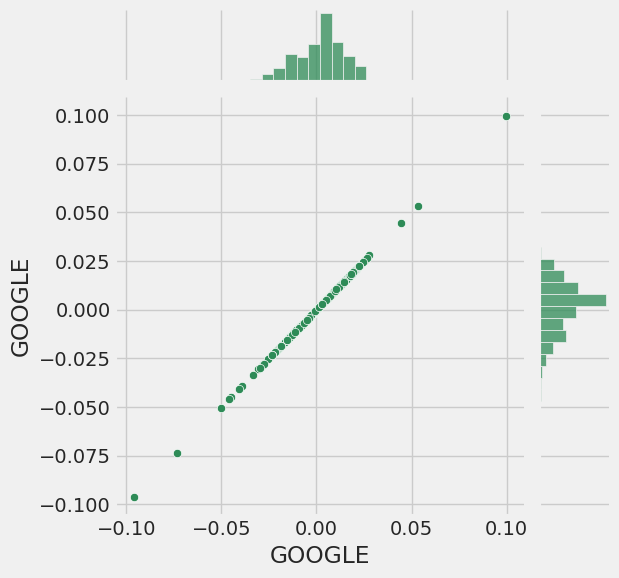

In [20]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGLE', y='GOOGLE', data=tech_rets, kind='scatter', color='seagreen')

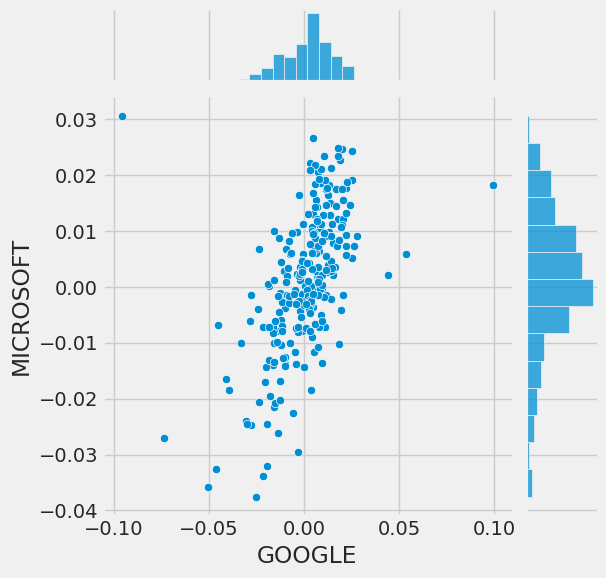

In [21]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOGLE', y='MICROSOFT', data=tech_rets, kind='scatter')

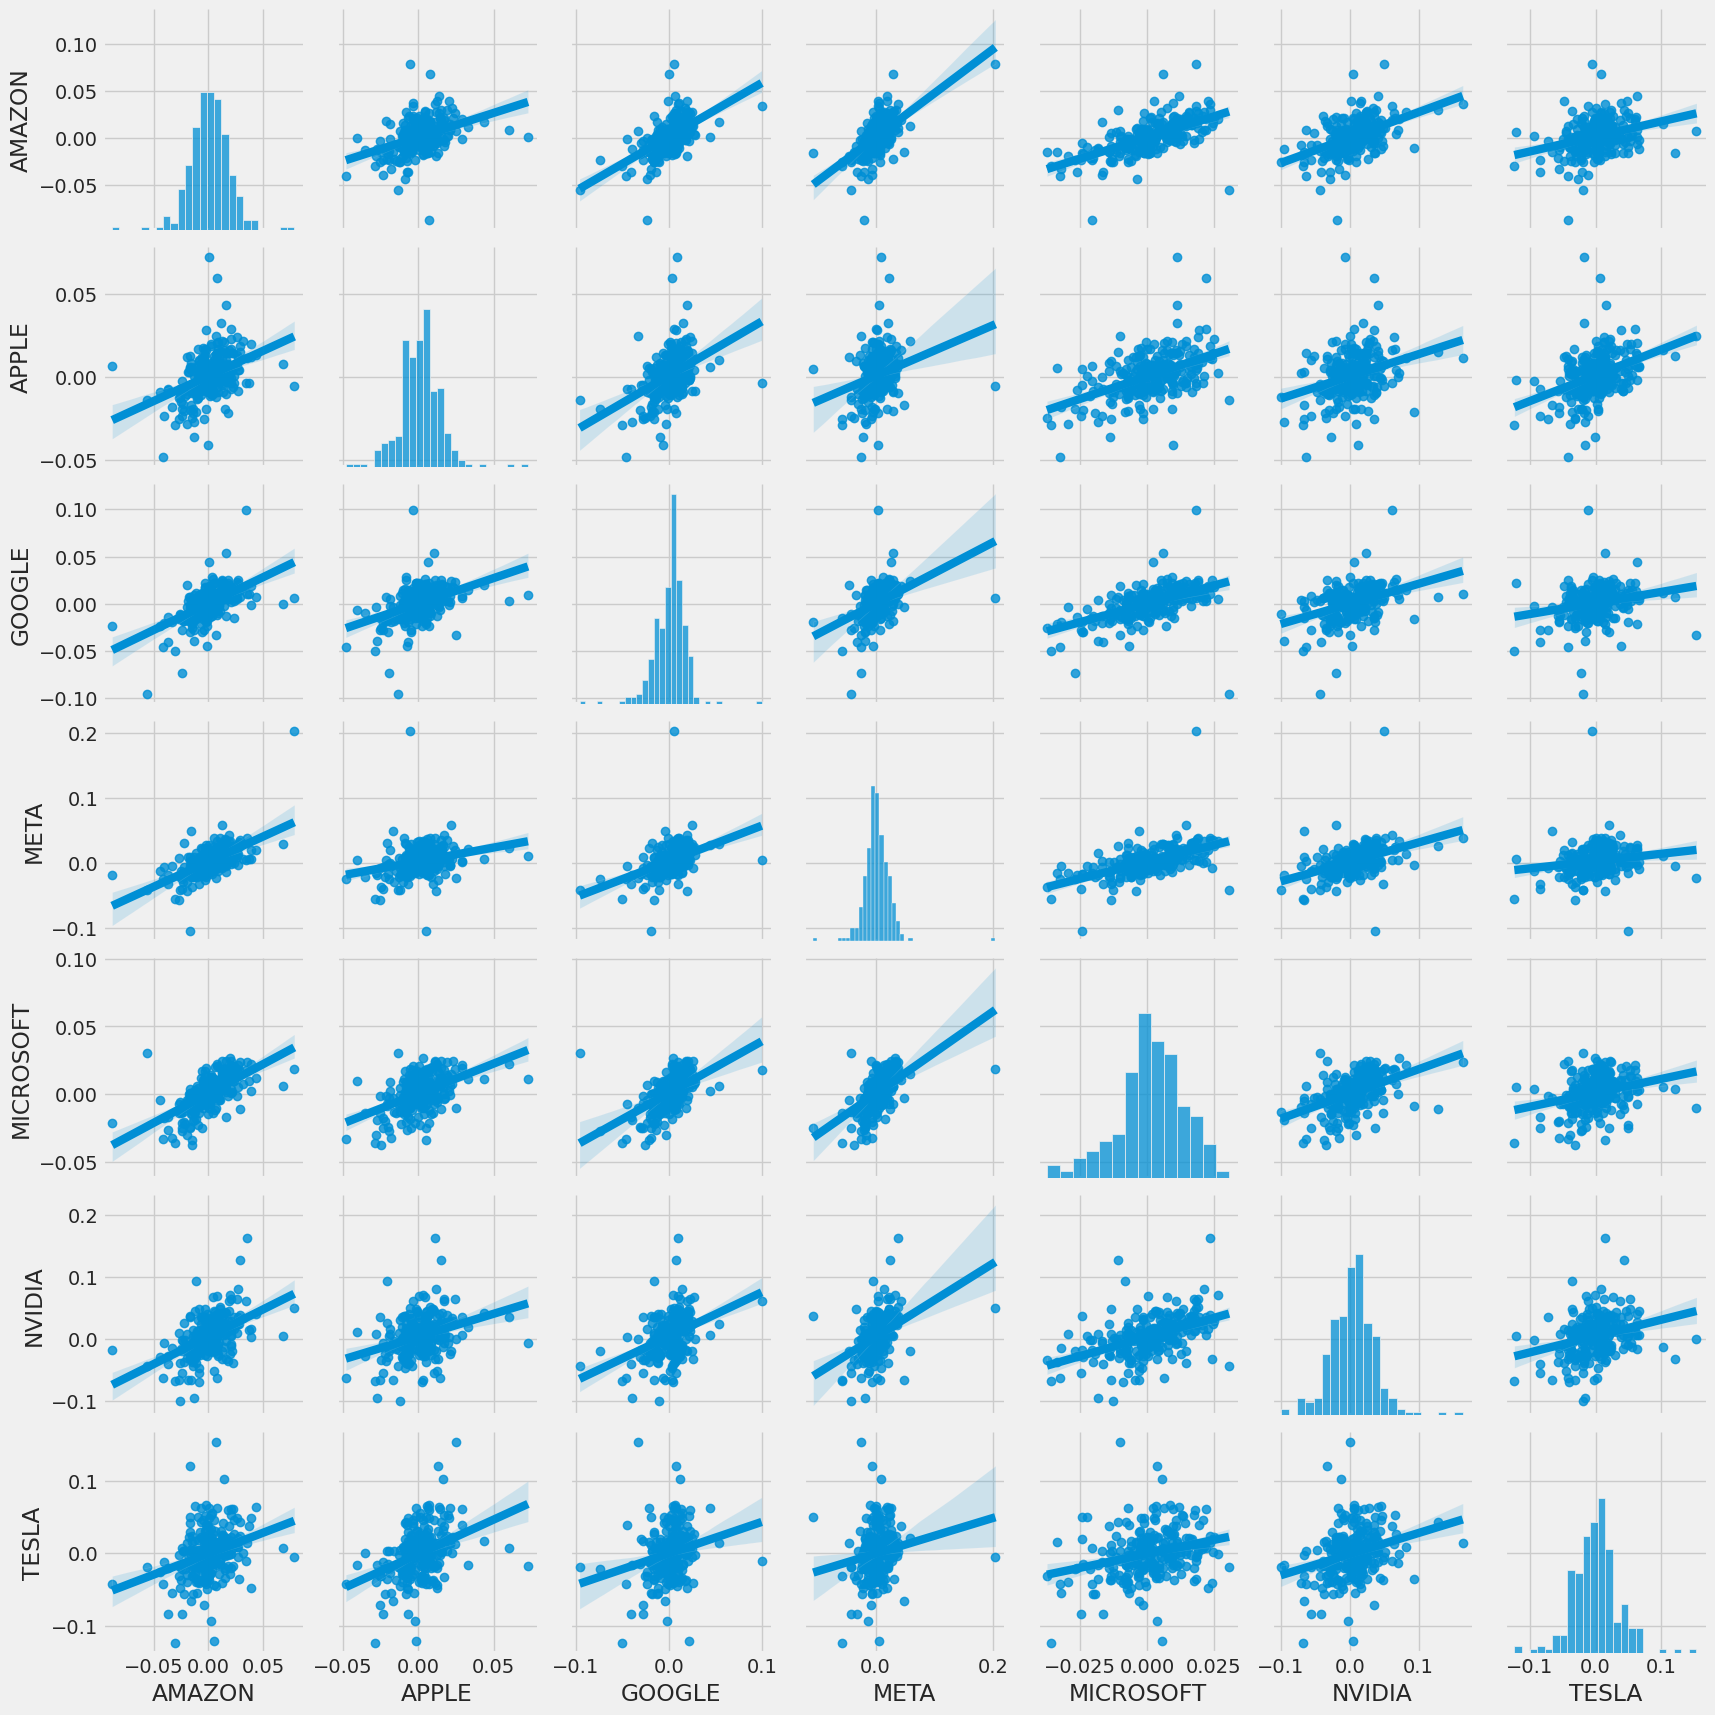

In [22]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')



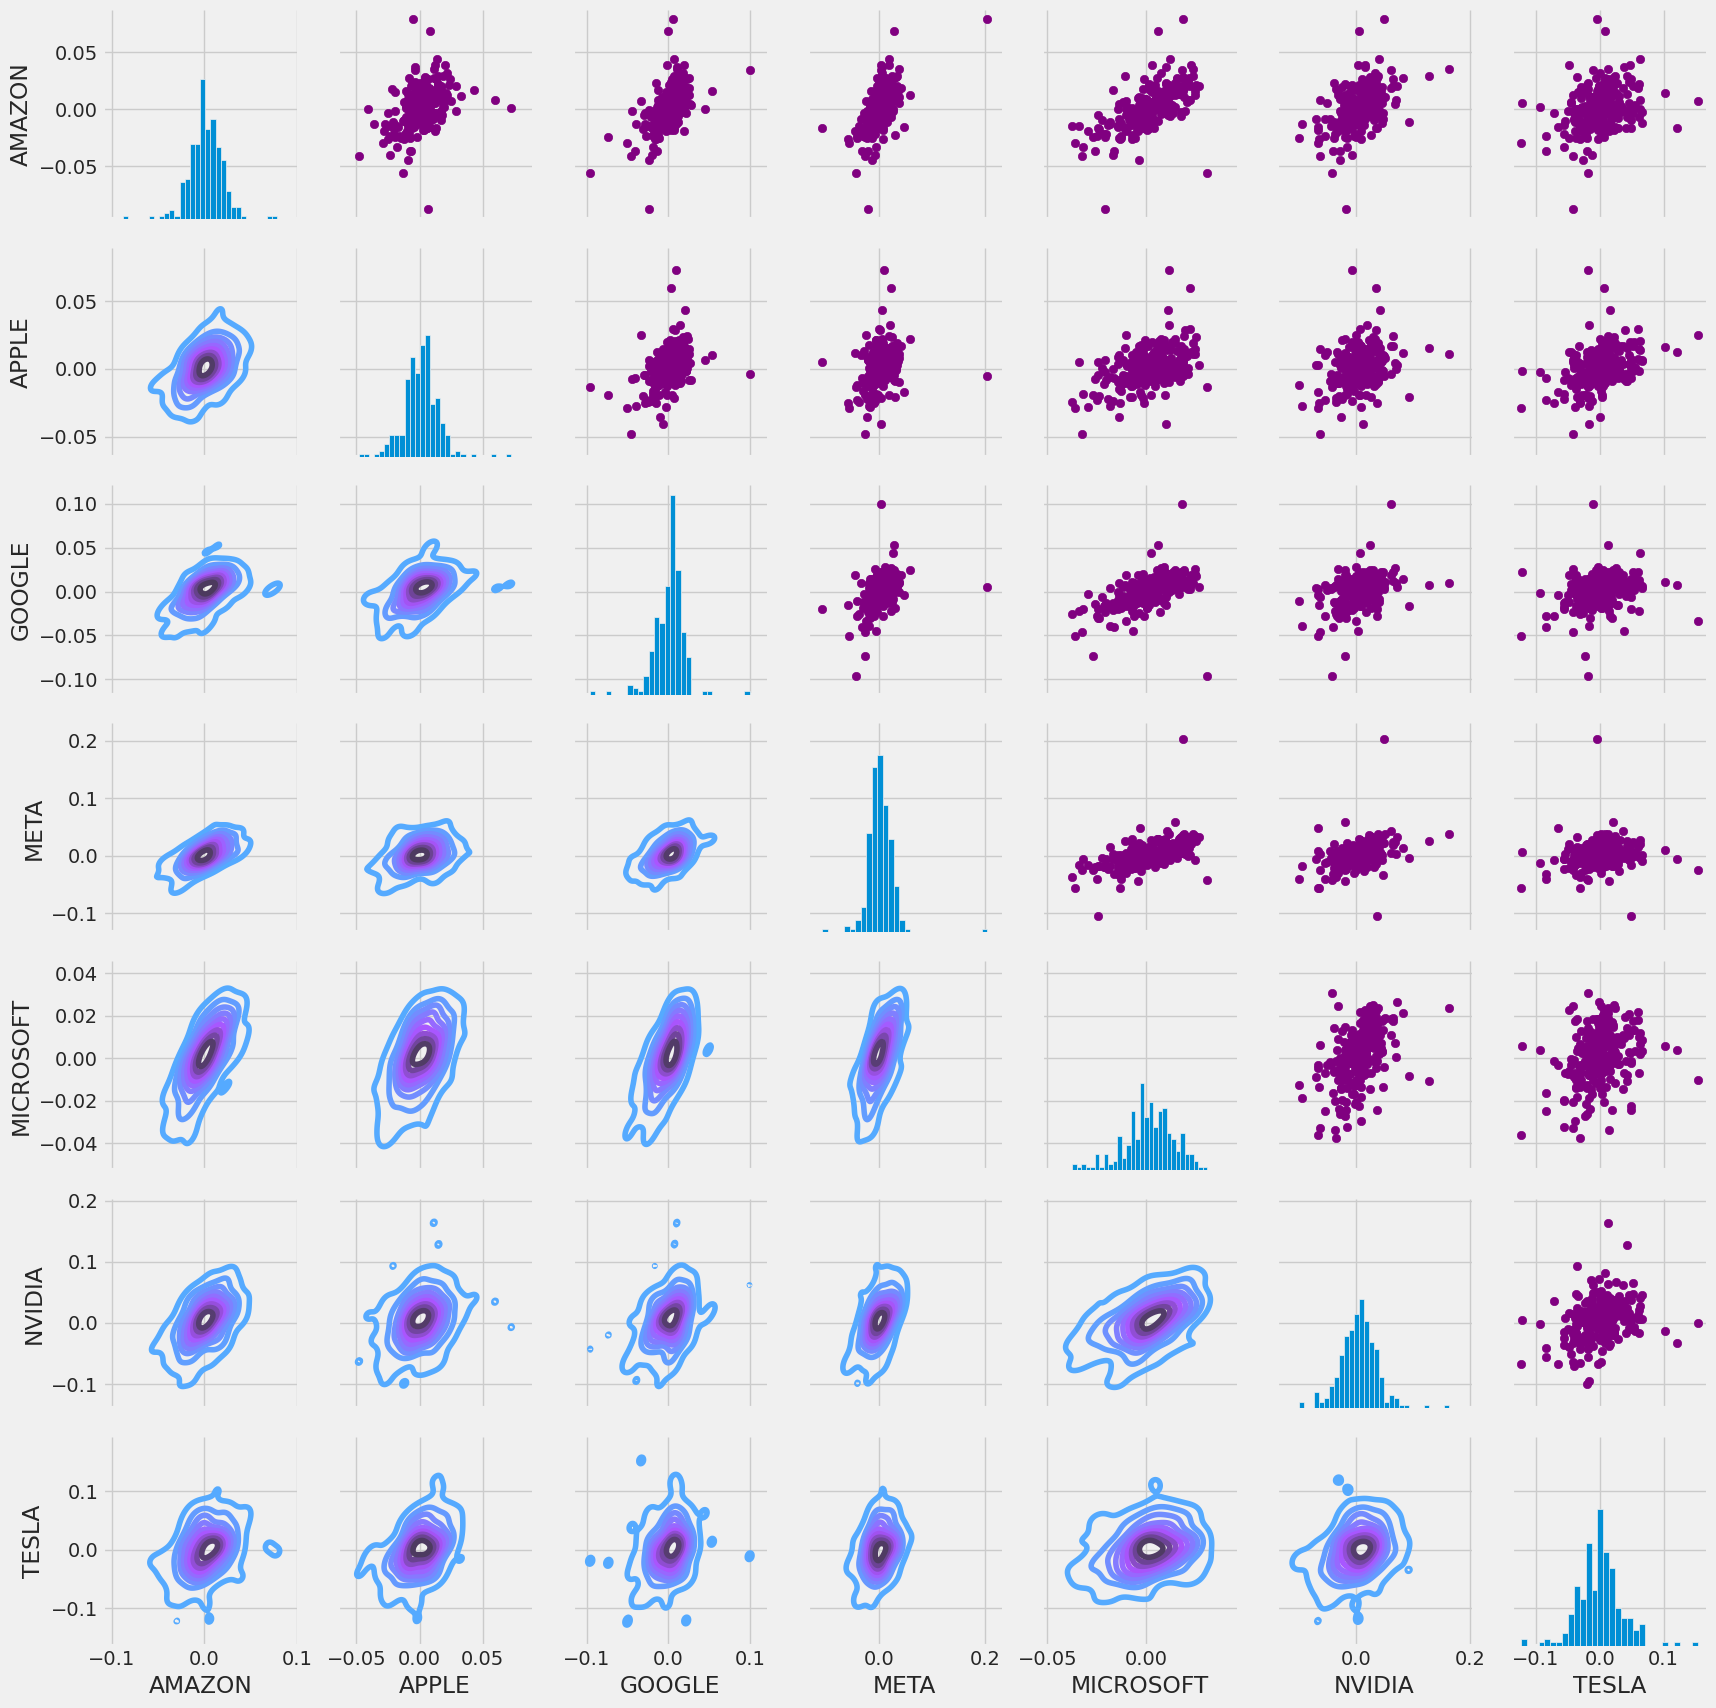

In [23]:


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)



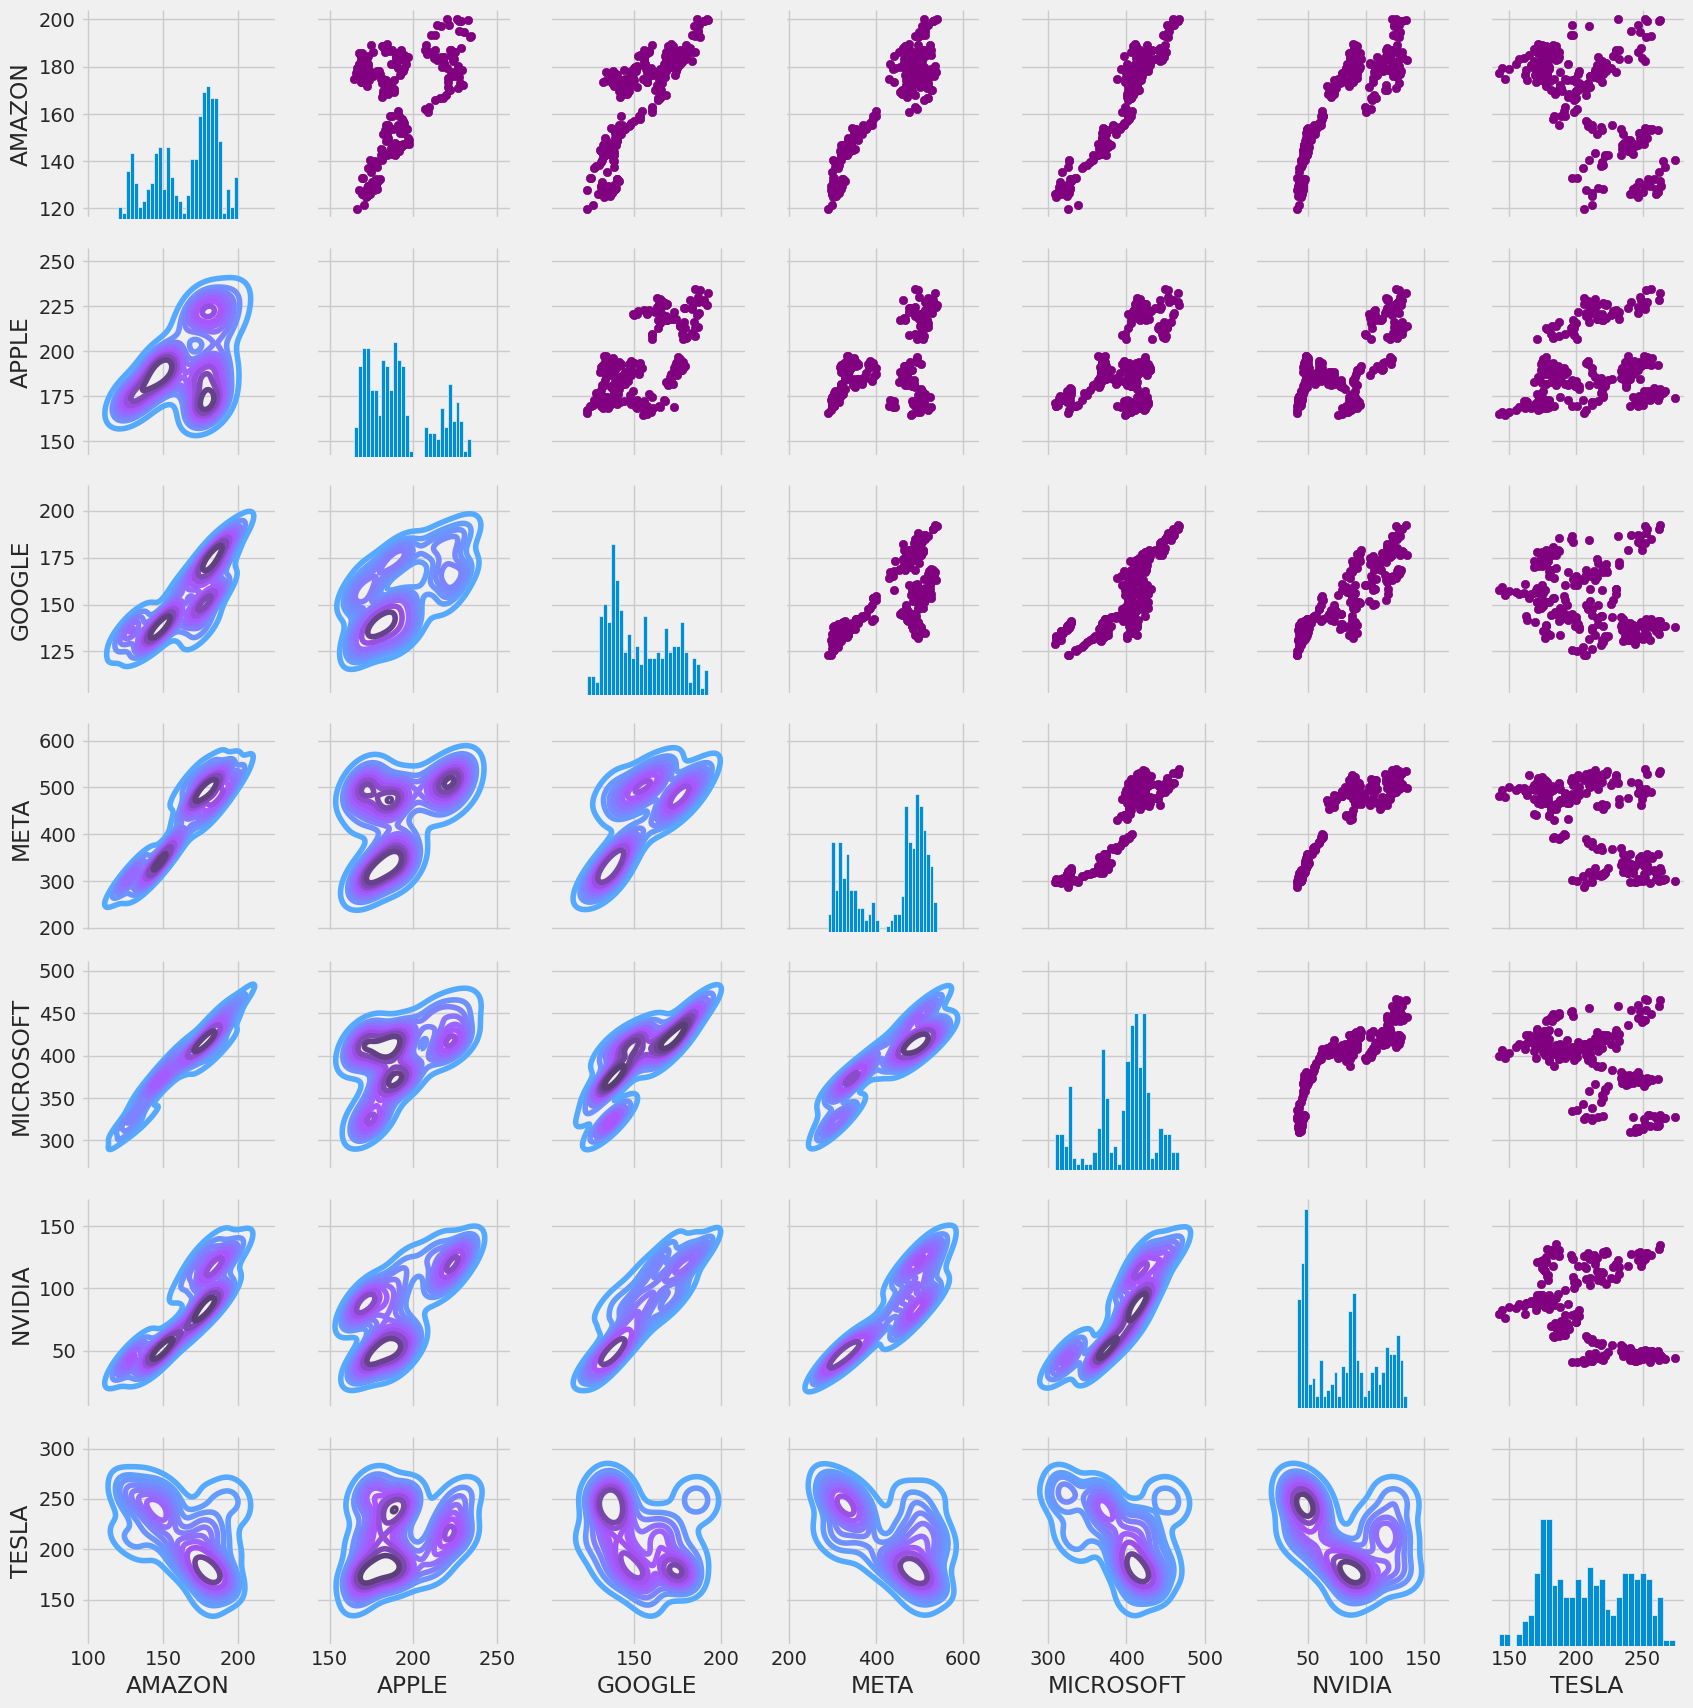

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df_pivot)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)



Text(0.5, 1.0, 'Correlation of stock closing price')

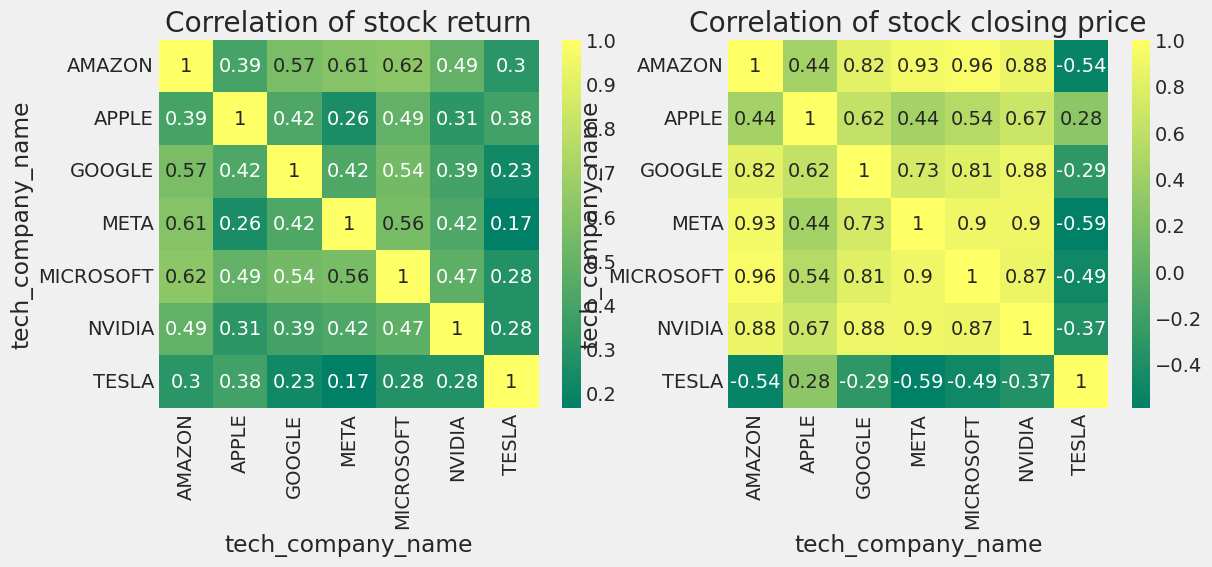

In [25]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df_pivot.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

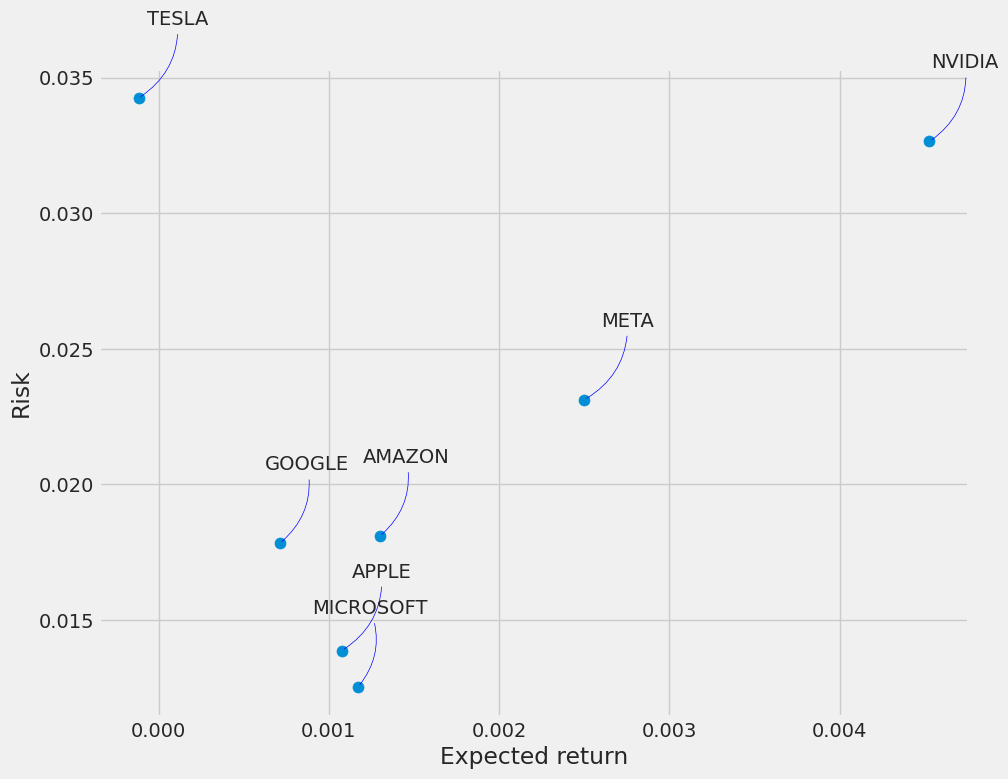

In [26]:

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



In [35]:
data = yf.download("AAPL", period="1y")
df = pd.DataFrame(data)

df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-14  174.000000  176.100006  173.580002  175.740005  174.845306   
2023-09-15  176.479996  176.500000  173.820007  175.009995  174.119019   
2023-09-18  176.479996  179.380005  176.169998  177.970001  177.063934   
2023-09-19  177.520004  179.630005  177.130005  179.070007  178.158356   
2023-09-20  179.259995  179.699997  175.399994  175.490005  174.596573   
...                ...         ...         ...         ...         ...   
2024-09-09  220.820007  221.270004  216.710007  220.910004  220.910004   
2024-09-10  218.919998  221.479996  216.729996  220.110001  220.110001   
2024-09-11  221.460007  223.089996  217.889999  222.660004  222.660004   
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   

               Volume  
Date                   
2023-09-14   60895800  
2023-09-15  109205100  
2023-09-18   67257600  
2023-09-19   51826900  
2023-09-20   58436200  
...               ...  
2024-09-09   67180000  
2024-09-10   51591000  
2024-09-11   44587100  
2024-09-12   37498200  
2024-09-13   36722900  

[252 rows x 6 columns]

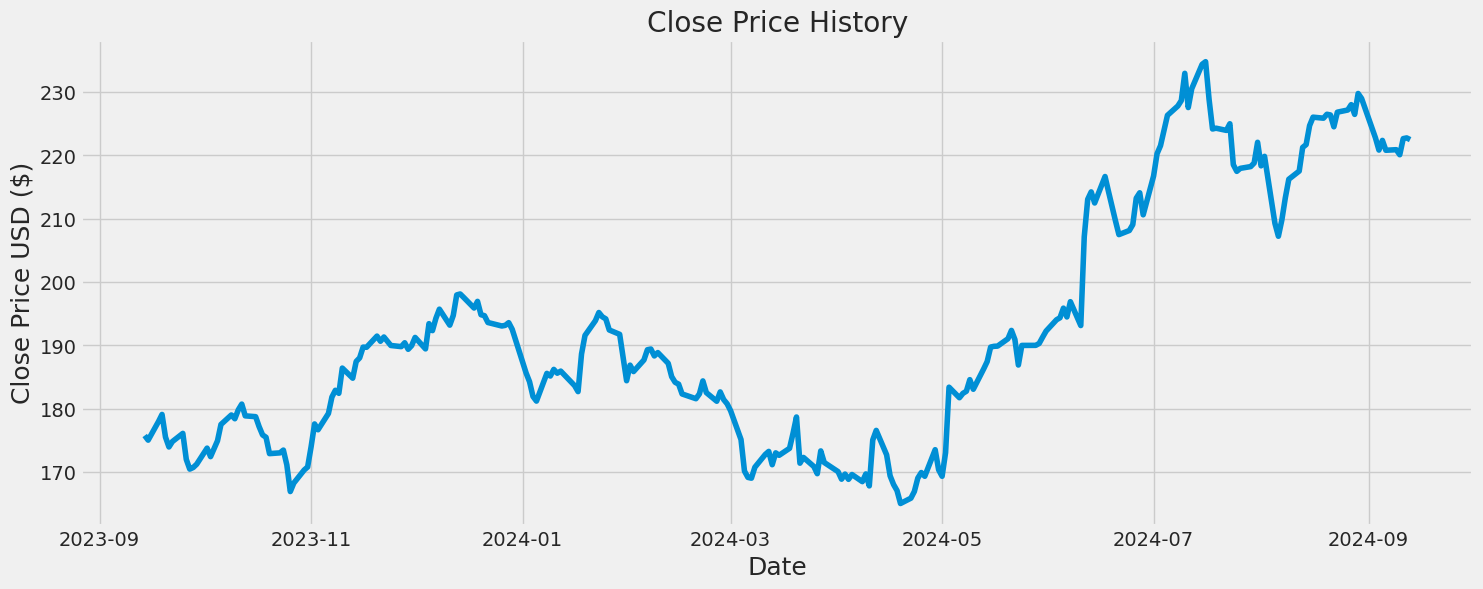

In [36]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()




In [29]:
## MIGHT DELETE THIS AND NEXT FEW BLOCKS

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len



240

In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15382418],
       [0.14336857],
       [0.18576339],
       [0.20151827],
       [0.15024355],
       [0.1279002 ],
       [0.14021759],
       [0.15869379],
       [0.09968499],
       [0.0777713 ],
       [0.0814953 ],
       [0.08894308],
       [0.12532224],
       [0.10598672],
       [0.12403327],
       [0.14193645],
       [0.17888863],
       [0.20037244],
       [0.19177883],
       [0.21197367],
       [0.22500723],
       [0.1983673 ],
       [0.1965053 ],
       [0.1740188 ],
       [0.1552563 ],
       [0.14981389],
       [0.1128617 ],
       [0.11458034],
       [0.12088229],
       [0.08736759],
       [0.0270696 ],
       [0.0461186 ],
       [0.07576615],
       [0.08264113],
       [0.12847322],
       [0.18003446],
       [0.16685753],
       [0.20380971],
       [0.24090526],
       [0.25623027],
       [0.24935551],
       [0.30650232],
       [0.28358638],
       [0.32139788],
       [0.32956162],
       [0.35391011],
       [0.3536236 ],
       [0.378

In [31]:


# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape



[array([0.15382418, 0.14336857, 0.18576339, 0.20151827, 0.15024355,
       0.1279002 , 0.14021759, 0.15869379, 0.09968499, 0.0777713 ,
       0.0814953 , 0.08894308, 0.12532224, 0.10598672, 0.12403327,
       0.14193645, 0.17888863, 0.20037244, 0.19177883, 0.21197367,
       0.22500723, 0.1983673 , 0.1965053 , 0.1740188 , 0.1552563 ,
       0.14981389, 0.1128617 , 0.11458034, 0.12088229, 0.08736759,
       0.0270696 , 0.0461186 , 0.07576615, 0.08264113, 0.12847322,
       0.18003446, 0.16685753, 0.20380971, 0.24090526, 0.25623027,
       0.24935551, 0.30650232, 0.28358638, 0.32139788, 0.32956162,
       0.35391011, 0.3536236 , 0.3788312 , 0.36722997, 0.37682605,
       0.3576339 , 0.35505572, 0.36379248, 0.34904028, 0.35734738,
       0.37582359, 0.3498996 , 0.40704662, 0.39129196, 0.41922087])]
[0.43984536654745776]

[array([0.15382418, 0.14336857, 0.18576339, 0.20151827, 0.15024355,
       0.1279002 , 0.14021759, 0.15869379, 0.09968499, 0.0777713 ,
       0.0814953 , 0.08894308, 0.12

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)





2024-09-15 19:05:53.495624: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-15 19:05:53.502158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 19:05:53.507941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 19:05:53.510466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-15 19:05:53.518027: I tensorflow/core/platform/cpu_feature_guar

180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171


In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

 

In [37]:
import torch

 
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [38]:
print(torch.cuda.is_available())

True


[*********************100%***********************]  1 of 1 completed


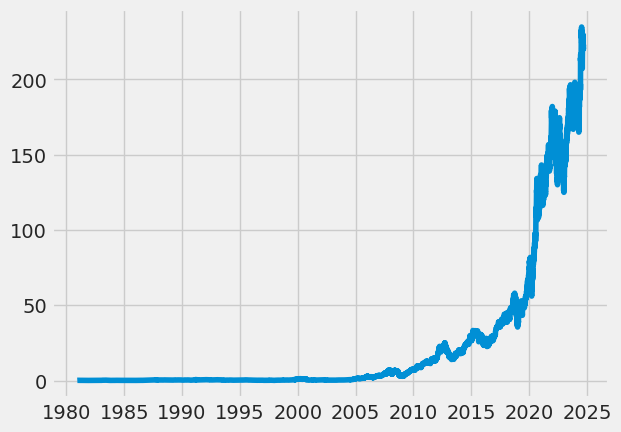

In [39]:
data = yf.download("AAPL", period="max")
df = pd.DataFrame(data)
df=df.reset_index()
df.head()
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'], df['Close'])

In [40]:
## START LSTM 
from copy import deepcopy as dc

# Create a new dataframe with only the 'Close column 
df = df[['Date', 'Close']]

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(df, lookback)
shifted_df





Close  Close(t-1)  Close(t-2)  Close(t-3)  Close(t-4)  \
Date                                                                     
1980-12-23    0.137835    0.132254    0.126116    0.118862    0.115513   
1980-12-24    0.145089    0.137835    0.132254    0.126116    0.118862   
1980-12-26    0.158482    0.145089    0.137835    0.132254    0.126116   
1980-12-29    0.160714    0.158482    0.145089    0.137835    0.132254   
1980-12-30    0.156808    0.160714    0.158482    0.145089    0.137835   
...                ...         ...         ...         ...         ...   
2024-09-09  220.910004  220.820007  222.380005  220.850006  222.770004   
2024-09-10  220.110001  220.910004  220.820007  222.380005  220.850006   
2024-09-11  222.660004  220.110001  220.910004  220.820007  222.380005   
2024-09-12  222.770004  222.660004  220.110001  220.910004  220.820007   
2024-09-13  222.500000  222.770004  222.660004  220.110001  220.910004   

            Close(t-5)  Close(t-6)  Close(t-7)  
Date                                            
1980-12-23    0.112723    0.121652    0.128348  
1980-12-24    0.115513    0.112723    0.121652  
1980-12-26    0.118862    0.115513    0.112723  
1980-12-29    0.126116    0.118862    0.115513  
1980-12-30    0.132254    0.126116    0.118862  
...                ...         ...         ...  
2024-09-09  229.000000  229.789993  226.490005  
2024-09-10  222.770004  229.000000  229.789993  
2024-09-11  220.850006  222.770004  229.000000  
2024-09-12  222.380005  220.850006  222.770004  
2024-09-13  220.820007  222.380005  220.850006  

[11023 rows x 8 columns]

In [41]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[1.37834996e-01, 1.32254004e-01, 1.26115993e-01, ...,
        1.12723000e-01, 1.21652000e-01, 1.28347993e-01],
       [1.45089000e-01, 1.37834996e-01, 1.32254004e-01, ...,
        1.15512997e-01, 1.12723000e-01, 1.21652000e-01],
       [1.58482000e-01, 1.45089000e-01, 1.37834996e-01, ...,
        1.18862003e-01, 1.15512997e-01, 1.12723000e-01],
       ...,
       [2.22660004e+02, 2.20110001e+02, 2.20910004e+02, ...,
        2.20850006e+02, 2.22770004e+02, 2.29000000e+02],
       [2.22770004e+02, 2.22660004e+02, 2.20110001e+02, ...,
        2.22380005e+02, 2.20850006e+02, 2.22770004e+02],
       [2.22500000e+02, 2.22770004e+02, 2.22660004e+02, ...,
        2.20820007e+02, 2.22380005e+02, 2.20850006e+02]])

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99924413, -0.99929168, -0.99934396, ..., -0.99945806,
        -0.99938199, -0.99932495],
       [-0.99918233, -0.99924413, -0.99929168, ..., -0.99943429,
        -0.99945806, -0.99938199],
       [-0.99906824, -0.99918233, -0.99924413, ..., -0.99940576,
        -0.99943429, -0.99945806],
       ...,
       [ 0.89640962,  0.87468629,  0.88150147, ...,  0.88099035,
         0.89734671,  0.95041969],
       [ 0.89734671,  0.89640962,  0.87468629, ...,  0.89402432,
         0.88099035,  0.89734671],
       [ 0.89504656,  0.89734671,  0.89640962, ...,  0.88073479,
         0.89402432,  0.88099035]])

In [44]:
x = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

x.shape, y.shape

((11023, 7), (11023,))

In [45]:
x = dc(np.flip(x, axis=1))
x

array([[-0.99932495, -0.99938199, -0.99945806, ..., -0.99940576,
        -0.99934396, -0.99929168],
       [-0.99938199, -0.99945806, -0.99943429, ..., -0.99934396,
        -0.99929168, -0.99924413],
       [-0.99945806, -0.99943429, -0.99940576, ..., -0.99929168,
        -0.99924413, -0.99918233],
       ...,
       [ 0.95041969,  0.89734671,  0.88099035, ...,  0.88073479,
         0.88150147,  0.87468629],
       [ 0.89734671,  0.88099035,  0.89402432, ...,  0.88150147,
         0.87468629,  0.89640962],
       [ 0.88099035,  0.89402432,  0.88073479, ...,  0.87468629,
         0.89640962,  0.89734671]])

In [46]:
split_index = int(len(x) * 0.95)
split_index

10471

In [47]:
x_train = x[:split_index]
x_test = x[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10471, 7), (552, 7), (10471,), (552,))

In [48]:
x_train = x_train.reshape((-1, lookback, 1))
x_test = x_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10471, 7, 1), (552, 7, 1), (10471, 1), (552, 1))

In [49]:
import torch
import torch.nn as nn

x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([10471, 7, 1]),
 torch.Size([552, 7, 1]),
 torch.Size([10471, 1]),
 torch.Size([552, 1]))

In [50]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    
train_dataset = TimeSeriesDataset(x_train, y_train)
test_dataset = TimeSeriesDataset(x_test, y_test)

In [51]:
train_dataset

In [52]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [53]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [54]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [56]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [57]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [58]:
learning_rate = 0.001
num_epochs = 20
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.328
Batch 200, Loss: 0.058
Batch 300, Loss: 0.043
Batch 400, Loss: 0.038
Batch 500, Loss: 0.023
Batch 600, Loss: 0.009

Val Loss: 0.400
***************************************************

Epoch: 2
Batch 100, Loss: 0.006
Batch 200, Loss: 0.003
Batch 300, Loss: 0.003
Batch 400, Loss: 0.002
Batch 500, Loss: 0.001
Batch 600, Loss: 0.001

Val Loss: 0.078
***************************************************

Epoch: 3
Batch 100, Loss: 0.001
Batch 200, Loss: 0.000
Batch 300, Loss: 0.001
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.046
***************************************************

Epoch: 4
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.026
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 60

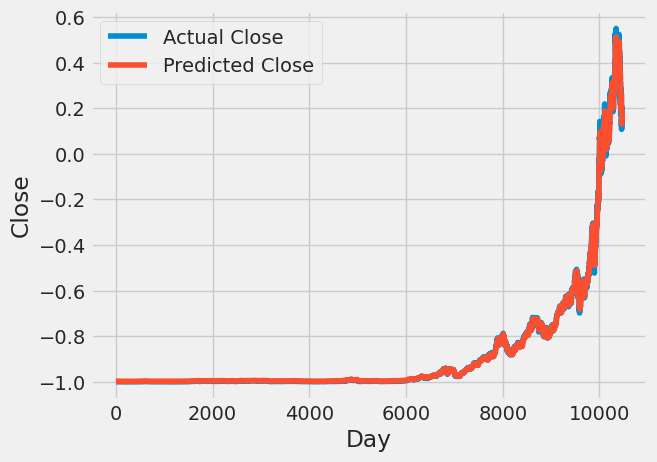

In [59]:
with torch.no_grad():
    predicted = model(x_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [61]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([-0.99693996, -0.99691319, -0.99687397, ...,  0.18024157,
        0.17712532,  0.178854  ])

In [62]:
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([-0.99924415, -0.99918234, -0.99906826, ...,  0.16429161,
        0.1831184 ,  0.20552327])

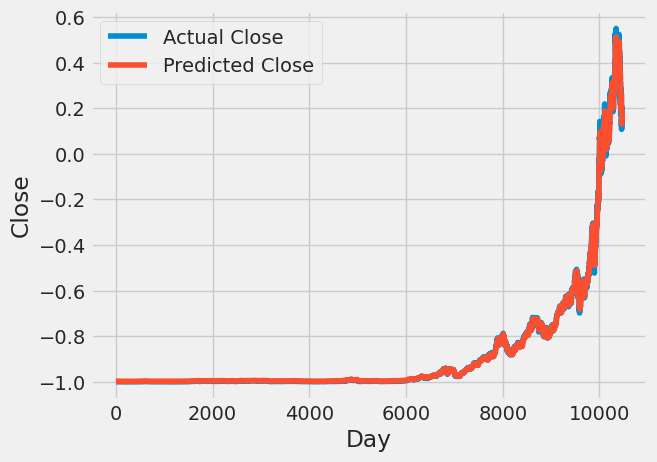

In [63]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [65]:
test_predictions = model(x_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([0.18411766, 0.19013827, 0.20245369, 0.21599166, 0.22234656,
       0.23027332, 0.2346537 , 0.24262126, 0.25182748, 0.25231314,
       0.26006985, 0.27121753, 0.28458971, 0.29365319, 0.29781145,
       0.29773843, 0.30811292, 0.31585312, 0.33121336, 0.34178632,
       0.34899503, 0.36611962, 0.38014007, 0.38886011, 0.39494467,
       0.39762664, 0.40737629, 0.41484094, 0.42461002, 0.4350853 ,
       0.44421333, 0.45455295, 0.46239716, 0.46283996, 0.45691204,
       0.44889545, 0.44129598, 0.43867016, 0.42556012, 0.41111398,
       0.39540422, 0.38028502, 0.36830944, 0.35420567, 0.33933413,
       0.33270603, 0.32571191, 0.32654172, 0.33926362, 0.33305502,
       0.33161479, 0.32482642, 0.31477809, 0.31332558, 0.31529182,
       0.30942142, 0.30752695, 0.30082113, 0.29672498, 0.29538429,
       0.28893143, 0.26873964, 0.24457906, 0.23222162, 0.2299882 ,
       0.22946896, 0.22787715, 0.21761928, 0.21259381, 0.20657663,
       0.19804801, 0.19867916, 0.19048588, 0.19275735, 0.19961

In [67]:
dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([0.21710902, 0.24632907, 0.25220704, 0.23372094, 0.24215475,
       0.23900278, 0.26438919, 0.27887136, 0.25246271, 0.28594211,
       0.30332071, 0.32299957, 0.3122656 , 0.30255401, 0.29105353,
       0.33526674, 0.34003744, 0.38399509, 0.37547615, 0.36269775,
       0.41483375, 0.41210765, 0.408189  , 0.40409982, 0.40452579,
       0.44132769, 0.43493846, 0.46569186, 0.47497749, 0.47361442,
       0.48656324, 0.48315558, 0.46075085, 0.42710105, 0.42420453,
       0.42676023, 0.44805759, 0.39345112, 0.37436879, 0.35332698,
       0.33892995, 0.34523401, 0.32691821, 0.31601396, 0.32819611,
       0.31541771, 0.34020773, 0.3918325 , 0.31013587, 0.32265872,
       0.29761302, 0.28338641, 0.315588  , 0.33620381, 0.30911365,
       0.30076513, 0.28108624, 0.28398278, 0.29241645, 0.2760601 ,
       0.21336067, 0.17689961, 0.21310511, 0.24419934, 0.24675491,
       0.23849154, 0.19300041, 0.19581167, 0.18354437, 0.17809226,
       0.21770541, 0.17843308, 0.21276441, 0.22417976, 0.22511

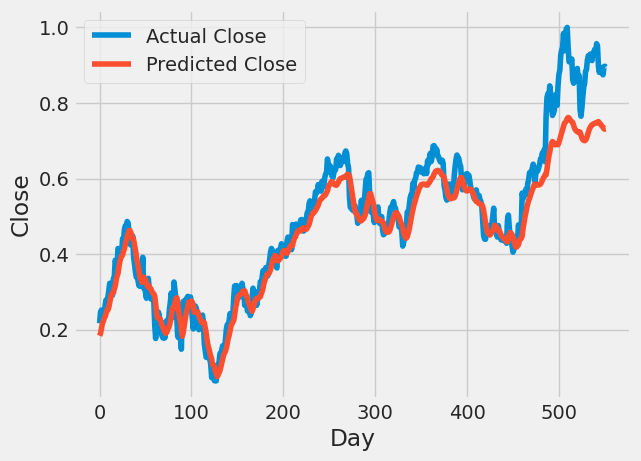

In [68]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
